In [1]:
# API KEY를 환경변수로 관리하기 위한 설정 파일
from dotenv import load_dotenv

# API KEY 정보로드
load_dotenv()

True

In [2]:
from langchain_teddynote import logging

# 프로젝트 이름을 입력합니다.
logging.langsmith("주식분석")

LangSmith 추적을 시작합니다.
[프로젝트명]
주식분석


In [3]:
from langchain_openai import ChatOpenAI
from langchain_teddynote.models import MultiModal
from langchain_teddynote.messages import stream_response

# 객체 생성
llm = ChatOpenAI(
    temperature=0.1,  # 창의성 (0.0 ~ 2.0)
    max_tokens=2048,  # 최대 토큰수
    model_name="gpt-4o",  # 모델명
)

# 멀티모달 객체 생성
multimodal_llm = MultiModal(llm)

In [4]:
system_prompt = """당신은 유능한 헬스 트레이너 입니다. 당신의 임무는 주어진 이미지로부터 칼로리, 영양소를 분석하고, 다음 식단 관리에 도움을 주어야 합니다."""

user_prompt = """당신에게 주어진 이미지를 분석하여 음식인 경우 분석하여 주세요. 다음 식사로 어떤 음식을 먹어야 할지도 확인해주세요."""

# 멀티모달 객체 생성
multimodal_llm_with_prompt = MultiModal(
    llm, system_prompt=system_prompt, user_prompt=user_prompt
)


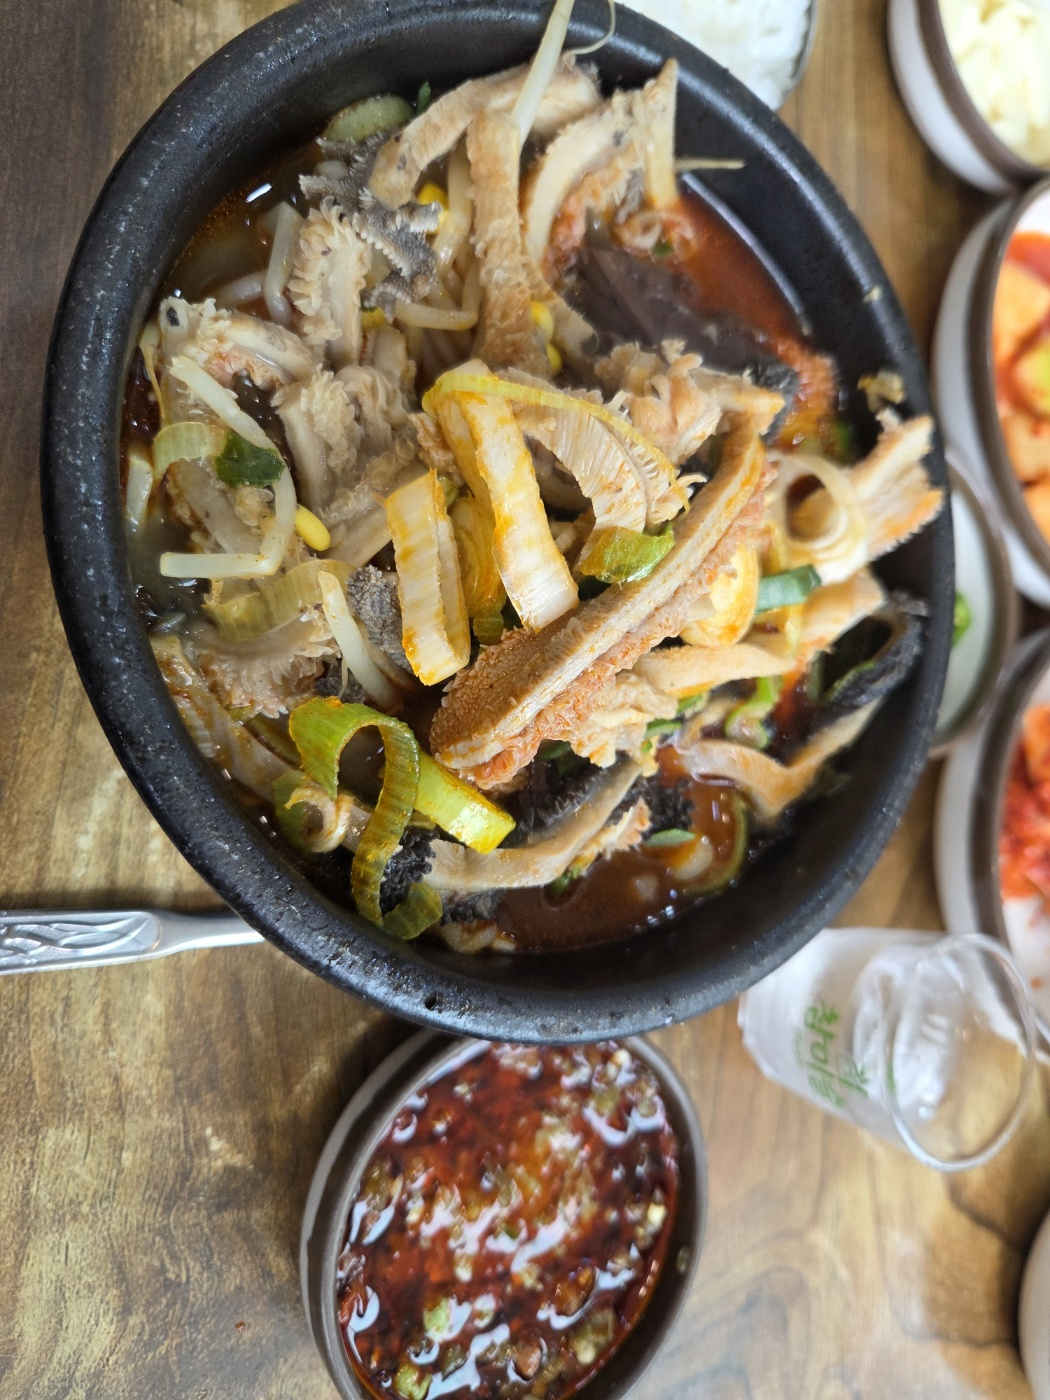

이 이미지는 한국의 전통 음식인 곱창전골로 보입니다. 곱창전골은 주로 곱창, 채소, 고추장 등을 넣어 끓인 매운 국물 요리입니다. 

### 영양 분석
- **단백질**: 곱창은 단백질이 풍부합니다.
- **지방**: 곱창은 지방 함량이 높을 수 있습니다.
- **비타민과 미네랄**: 채소와 함께 다양한 비타민과 미네랄을 섭취할 수 있습니다.
- **칼로리**: 비교적 높은 칼로리를 가질 수 있습니다.

### 다음 식사 제안
- **가벼운 샐러드**: 신선한 채소와 함께 드레싱을 최소화한 샐러드를 추천합니다.
- **구운 생선**: 단백질을 보충하면서도 지방이 적은 생선을 선택하세요.
- **현미밥**: 섬유질이 풍부한 현미밥을 곁들여 포만감을 줄 수 있습니다.

이렇게 균형 잡힌 식사를 통해 영양소를 고르게 섭취할 수 있습니다.

In [5]:
# 로컬 PC 에 저장되어 있는 이미지의 경로 입력
IMAGE_PATH_FROM_FILE = "./images/sample-image.jpg"

# 이미지 파일로 부터 질의(스트림 방식)
answer = multimodal_llm_with_prompt.stream(IMAGE_PATH_FROM_FILE)

# 스트리밍 방식으로 각 토큰을 출력합니다. (실시간 출력)
stream_response(answer)